# 📌 Dataset Preparation (Step 1)

This notebook is dedicated to **preparing the dataset** for further analysis and modeling.  

### 🔹 What it does
- Loads yearly `.pkl` files (`text_us_{year}.pkl`) stored in  
  `src/text_processing/text_dataset/`
- Merges them into a single Polars DataFrame
- Adds a `year` column for reference
- Sanity check: validates row counts after concatenation
- Exports the final dataset into one file:  
  `text_dataset.parquet` (⚠️ ~5 minutes to write)
- Optional cleanup: deletes the dataset from memory once exported  

### 🔹 Parameters
- `start_date` = **2005**  
- `end_date` = **2025**  
- `delete_after = True` → free RAM after export  
- `ignore_warnings = True` → silence `DeprecationWarning`  
- `export_to_parquet = True` → save merged dataset  

---

👉 After this step, your dataset is **consolidated and ready** to be used in the next notebooks (feature engineering, modeling, etc.).

# Setting up env

## Importing Libs

In [3]:
import os
import pickle as pkl
import polars as pl
import gc
import warnings
import gc
import matplotlib.pyplot as plt

## Setting up paths

In [1]:
from paths import DATASET_DIR, DATASET_OUTPUT_FILE, SP500_OUTPUT_FILE

## Parameters

In [2]:
start_date = 2005
end_date = 2025
delete_after = False
ignore_warnings = True
export_to_parquet = False

## Messing with warnings

In [4]:
# Suppress DeprecationWarnings during dataset loading
if ignore_warnings == True:
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load dataset converter function

In [2]:
import os
import pickle as pkl
import polars as pl
import gc

def load_datasets_polars(
    path: str = "./dataset",
    start_date: int = 2005,
    end_date: int = 2025,
    out_file: str = "./dataset/text_us.parquet"
) -> pl.DataFrame:
    
    if not os.path.isdir(path):
        raise FileNotFoundError(f"Dataset folder not found: {path}")

    df_all = None  # empty df init
    total_rows = 0  # Cumulative row counter

    for year in range(start_date, end_date + 1):
        file_path = os.path.join(path, f"text_us_{year}.pkl")
        try:
            with open(file_path, "rb") as f:
                df = pkl.load(f)  # Pandas DataFrame
            df["year"] = year
            df_polars = pl.from_pandas(df)
            del df
            gc.collect()

            # Row counter
            total_rows += df_polars.height
            print(f"[OK] Loaded text_us_{year}.pkl ({df_polars.height} lignes, cumul={total_rows})")

            if df_all is None:
                df_all = df_polars
            else:
                df_all = pl.concat([df_all, df_polars], how="vertical")

        except FileNotFoundError:
            raise FileNotFoundError(f"Missing dataset for year {year}: {file_path}")
        except Exception as e:
            raise RuntimeError(f"Error loading {file_path}: {e}")

    # Sanity check: compare row counts
    print(f"\n[ℹ️] Compteur de lignes cumulées : {total_rows}")
    print(f"[ℹ️] Nombre de lignes dans df_all : {df_all.height}")

    if total_rows == df_all.height:
        print("[✅] Les deux comptes correspondent, concat ok.")
    else:
        print("[⚠️] Attention : mismatch détecté !")

    df_all = df_all.with_columns([
        pl.col("date").str.strptime(pl.Date, "%Y%m%d", strict=False)
    ])



    return df_all

In [3]:
df = load_datasets_polars(path=DATASET_DIR, start_date=2005,
                          end_date=2025, out_file=DATASET_OUTPUT_FILE)
print("Loaded datasets:")

/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2005.pkl (16857 lignes, cumul=16857)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2006.pkl (16553 lignes, cumul=33410)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2007.pkl (16875 lignes, cumul=50285)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2008.pkl (18391 lignes, cumul=68676)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2009.pkl (18133 lignes, cumul=86809)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2010.pkl (17537 lignes, cumul=104346)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2011.pkl (17398 lignes, cumul=121744)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2012.pkl (16968 lignes, cumul=138712)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2013.pkl (17401 lignes, cumul=156113)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2014.pkl (17814 lignes, cumul=173927)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2015.pkl (17514 lignes, cumul=191441)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2016.pkl (16840 lignes, cumul=208281)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2017.pkl (16424 lignes, cumul=224705)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2018.pkl (16326 lignes, cumul=241031)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2019.pkl (16222 lignes, cumul=257253)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2020.pkl (16335 lignes, cumul=273588)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2021.pkl (17318 lignes, cumul=290906)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2022.pkl (17703 lignes, cumul=308609)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2023.pkl (17834 lignes, cumul=326443)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2024.pkl (20352 lignes, cumul=346795)


/var/folders/3d/px25gn9n1cg8clmw10nxnsg00000gn/T/ipykernel_12355/147803164.py:23: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pkl.load(f)  # Pandas DataFrame


[OK] Loaded text_us_2025.pkl (11644 lignes, cumul=358439)

[ℹ️] Compteur de lignes cumulées : 358439
[ℹ️] Nombre de lignes dans df_all : 358439
[✅] Les deux comptes correspondent, concat ok.
Loaded datasets:


## Verify Dataset

In [5]:
print(df.head())

shape: (5, 8)
┌────────────┬─────────┬───────────┬─────┬───────────────────────────┬──────────┬───────────┬──────┐
│ date       ┆ cik     ┆ file_type ┆ rf  ┆ mgmt                      ┆ gvkey    ┆ cusip     ┆ year │
│ ---        ┆ ---     ┆ ---       ┆ --- ┆ ---                       ┆ ---      ┆ ---       ┆ ---  │
│ date       ┆ i64     ┆ str       ┆ str ┆ str                       ┆ f64      ┆ str       ┆ i64  │
╞════════════╪═════════╪═══════════╪═════╪═══════════════════════════╪══════════╪═══════════╪══════╡
│ 2005-01-03 ┆ 16099   ┆ 10Q       ┆     ┆ Item 2 Management s       ┆ 6831.0   ┆ 549282101 ┆ 2005 │
│            ┆         ┆           ┆     ┆ Discussion…               ┆          ┆           ┆      │
│ 2005-01-03 ┆ 779544  ┆ 10K       ┆     ┆ Item 7. Management's      ┆ 11872.0  ┆ 040712101 ┆ 2005 │
│            ┆         ┆           ┆     ┆ Discussio…                ┆          ┆           ┆      │
│ 2005-01-03 ┆ 831641  ┆ 10K       ┆     ┆ Item 7                    ┆ 24783.

# Process dataFrame

## Importing sp500 ticker list

In [8]:
df_sp500 = pl.read_parquet(SP500_OUTPUT_FILE)
print(df_sp500.shape)
print(df_sp500.head(5))

(503, 3)
shape: (5, 3)
┌────────┬─────────────────────┬─────────┐
│ Symbol ┆ Security            ┆ cik     │
│ ---    ┆ ---                 ┆ ---     │
│ str    ┆ str                 ┆ i64     │
╞════════╪═════════════════════╪═════════╡
│ MMM    ┆ 3M                  ┆ 66740   │
│ AOS    ┆ A. O. Smith         ┆ 91142   │
│ ABT    ┆ Abbott Laboratories ┆ 1800    │
│ ABBV   ┆ AbbVie              ┆ 1551152 │
│ ACN    ┆ Accenture           ┆ 1467373 │
└────────┴─────────────────────┴─────────┘


## First pre filtering sp500

In [9]:
df = df.join(df_sp500.select("cik"), on="cik", how="inner") #filtrage des tickers du sp500
print(df.shape)
print(df.head(10))

(35305, 8)
shape: (10, 8)
┌────────────┬─────────┬───────────┬─────┬────────────────────────┬─────────┬───────────┬──────┐
│ date       ┆ cik     ┆ file_type ┆ rf  ┆ mgmt                   ┆ gvkey   ┆ cusip     ┆ year │
│ ---        ┆ ---     ┆ ---       ┆ --- ┆ ---                    ┆ ---     ┆ ---       ┆ ---  │
│ date       ┆ i64     ┆ str       ┆ str ┆ str                    ┆ f64     ┆ str       ┆ i64  │
╞════════════╪═════════╪═══════════╪═════╪════════════════════════╪═════════╪═══════════╪══════╡
│ 2005-01-06 ┆ 23217   ┆ 10Q       ┆     ┆ Item 2.                ┆ 3362.0  ┆ 205887102 ┆ 2005 │
│            ┆         ┆           ┆     ┆ Management s Discussi… ┆         ┆           ┆      │
│ 2005-01-06 ┆ 40704   ┆ 10Q       ┆     ┆ Item 2. Management s   ┆ 5071.0  ┆ 370334104 ┆ 2005 │
│            ┆         ┆           ┆     ┆ Discussio…             ┆         ┆           ┆      │
│ 2005-01-06 ┆ 764478  ┆ 10Q       ┆     ┆ Item                   ┆ 2184.0  ┆ 086516101 ┆ 2005 │
│   

In [10]:
print(df.row(0))   # première ligne (index 0)

(datetime.date(2005, 1, 6), 23217, '10Q', '', 'Item 2. \nManagement s Discussion and Analysis of Financial Condition and Results\nof Operations. \n\nFORWARD-LOOKING\nSTATEMENTS \n\nThis\nreport, including Management s Discussion Analysis, contains\nforward-looking statements within the meaning of the Private Securities\nLitigation Reform Act of 1995. These\nstatements are based on management s current views and assumptions of future\nevents and financial performance and are subject to uncertainty and changes in\ncircumstances. Readers of this report\nshould understand that these statements are not guarantees of performance or\nresults. Many factors could affect the\ncompany s actual financial results and cause them to vary materially from the\nexpectations contained in the forward-looking statements. These factors include, among other things,\nfuture economic circumstances, industry conditions, company performance and\nfinancial results, availability and prices of raw materials, produc

## Export file type

### Erase 10KSB

In [11]:
# Supprimer les lignes où file_type == "10KSB"
df = df.filter(pl.col("file_type") != "10KSB")

### length max 250_000

In [12]:
# Filtrer les lignes avec rf ou mgmt <= 250_000 caractères
df = df.filter(
    (pl.col("rf").str.len_chars() <= 250_000) &
    (pl.col("mgmt").str.len_chars() <= 250_000)
)

print(df.shape)

(34795, 8)


### File type

In [13]:
df = df.filter(
    (pl.col("file_type") == "10Q") &
    (pl.col("rf").str.strip_chars() != "") &
    (pl.col("mgmt").str.strip_chars() != "")
)

print(df.shape)
print(df.head())

(21877, 8)
shape: (5, 8)
┌────────────┬────────┬───────────┬────────────────────┬──────────────┬─────────┬───────────┬──────┐
│ date       ┆ cik    ┆ file_type ┆ rf                 ┆ mgmt         ┆ gvkey   ┆ cusip     ┆ year │
│ ---        ┆ ---    ┆ ---       ┆ ---                ┆ ---          ┆ ---     ┆ ---       ┆ ---  │
│ date       ┆ i64    ┆ str       ┆ str                ┆ str          ┆ f64     ┆ str       ┆ i64  │
╞════════════╪════════╪═══════════╪════════════════════╪══════════════╪═════════╪═══════════╪══════╡
│ 2005-11-02 ┆ 20286  ┆ 10Q       ┆ Item 1A Risk       ┆ Item 2       ┆ 14824.0 ┆ 172062101 ┆ 2005 │
│            ┆        ┆           ┆ Factors            ┆ Management s ┆         ┆           ┆      │
│            ┆        ┆           ┆                    ┆ Discussion…  ┆         ┆           ┆      │
│            ┆        ┆           ┆ 39 Item…           ┆              ┆         ┆           ┆      │
│ 2005-12-12 ┆ 900075 ┆ 10Q       ┆ Item 1A Risk       ┆ Item 2   

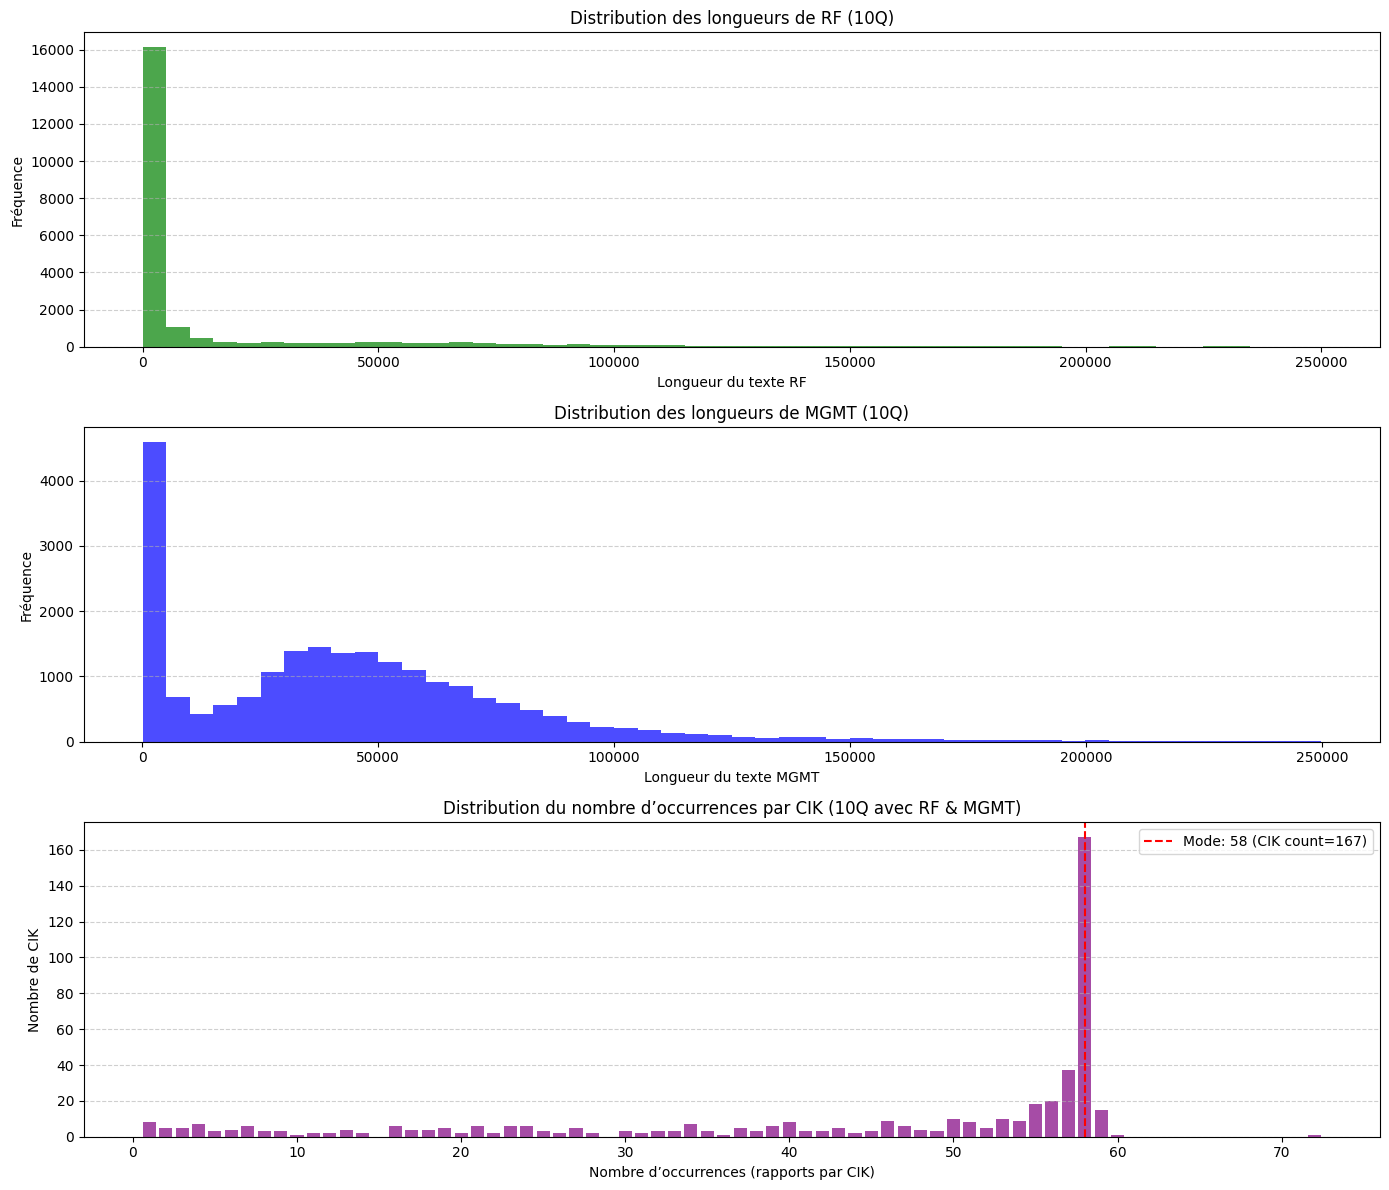

In [14]:
import matplotlib.pyplot as plt

# Ajouter colonnes de longueur
df_10q_rf_mgmt_len = df.with_columns([
    pl.col("rf").str.len_chars().alias("rf_len"),
    pl.col("mgmt").str.len_chars().alias("mgmt_len")
])

# Convertir en pandas
pdf = df_10q_rf_mgmt_len.to_pandas()

# --- Création des figures ---
plt.figure(figsize=(14, 12))

# 1. Histogramme des longueurs RF
plt.subplot(3, 1, 1)
plt.hist(pdf["rf_len"], bins=50, color="green", alpha=0.7)
plt.title("Distribution des longueurs de RF (10Q)")
plt.xlabel("Longueur du texte RF")
plt.ylabel("Fréquence")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 2. Histogramme des longueurs MGMT
plt.subplot(3, 1, 2)
plt.hist(pdf["mgmt_len"], bins=50, color="blue", alpha=0.7)
plt.title("Distribution des longueurs de MGMT (10Q)")
plt.xlabel("Longueur du texte MGMT")
plt.ylabel("Fréquence")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 3. Distribution du nombre d’occurrences par CIK
cik_counts = pdf["cik"].value_counts()
occurrence_distribution = cik_counts.value_counts().sort_index()

mode_occurrence = occurrence_distribution.idxmax()
mode_value = occurrence_distribution.max()

plt.subplot(3, 1, 3)
plt.bar(occurrence_distribution.index, occurrence_distribution.values, color="purple", alpha=0.7)
plt.title("Distribution du nombre d’occurrences par CIK (10Q avec RF & MGMT)")
plt.xlabel("Nombre d’occurrences (rapports par CIK)")
plt.ylabel("Nombre de CIK")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Annotation du mode
plt.axvline(mode_occurrence, color="red", linestyle="--", label=f"Mode: {mode_occurrence} (CIK count={mode_value})")
plt.legend()

# Affichage
plt.tight_layout()
plt.show()

In [15]:
# Compter le nombre d'occurrences par CIK
cik_counts = (
    df_10q_rf_mgmt_len
    .group_by("cik")
    .agg(pl.count().alias("count"))
)

# Garder uniquement les CIK avec 58 occurrences
cik_mode = cik_counts.filter(pl.col("count") == 58)["cik"]

# Filtrer le dataset initial
df_mode_cik = df_10q_rf_mgmt_len.filter(pl.col("cik").is_in(cik_mode))

print(df_mode_cik.shape)   # devrait donner (167*58, 8+2 colonnes avec rf_len/mgmt_len)
print(df_mode_cik.head())
print(df_mode_cik.row(0))

(9686, 10)
shape: (5, 10)
┌────────────┬─────────┬───────────┬────────────────────┬───┬───────────┬──────┬────────┬──────────┐
│ date       ┆ cik     ┆ file_type ┆ rf                 ┆ … ┆ cusip     ┆ year ┆ rf_len ┆ mgmt_len │
│ ---        ┆ ---     ┆ ---       ┆ ---                ┆   ┆ ---       ┆ ---  ┆ ---    ┆ ---      │
│ date       ┆ i64     ┆ str       ┆ str                ┆   ┆ str       ┆ i64  ┆ u32    ┆ u32      │
╞════════════╪═════════╪═══════════╪════════════════════╪═══╪═══════════╪══════╪════════╪══════════╡
│ 2006-02-09 ┆ 827054  ┆ 10Q       ┆ Item               ┆ … ┆ 595017104 ┆ 2006 ┆ 26984  ┆ 64486    │
│            ┆         ┆           ┆  1A. Risk Factors  ┆   ┆           ┆      ┆        ┆          │
│            ┆         ┆           ┆                    ┆   ┆           ┆      ┆        ┆          │
│            ┆         ┆           ┆ 28 It…             ┆   ┆           ┆      ┆        ┆          │
│ 2006-02-09 ┆ 1037038 ┆ 10Q       ┆ Item 1A.           ┆ … ┆ 751

In [16]:
# Ajouter les infos SP500 (Symbol, Security) via un join sur CIK
df_mode_cik = df_mode_cik.join(
    df_sp500.select(["cik", "Symbol", "Security"]),
    on="cik",
    how="left"
)

print(df_mode_cik.shape)
print(df_mode_cik.head())

(9744, 12)
shape: (5, 12)
┌────────────┬─────────┬───────────┬───────────────┬───┬────────┬──────────┬────────┬──────────────┐
│ date       ┆ cik     ┆ file_type ┆ rf            ┆ … ┆ rf_len ┆ mgmt_len ┆ Symbol ┆ Security     │
│ ---        ┆ ---     ┆ ---       ┆ ---           ┆   ┆ ---    ┆ ---      ┆ ---    ┆ ---          │
│ date       ┆ i64     ┆ str       ┆ str           ┆   ┆ u32    ┆ u32      ┆ str    ┆ str          │
╞════════════╪═════════╪═══════════╪═══════════════╪═══╪════════╪══════════╪════════╪══════════════╡
│ 2006-02-09 ┆ 827054  ┆ 10Q       ┆ Item          ┆ … ┆ 26984  ┆ 64486    ┆ MCHP   ┆ Microchip    │
│            ┆         ┆           ┆ 1A. Risk      ┆   ┆        ┆          ┆        ┆ Technology   │
│            ┆         ┆           ┆ Factors       ┆   ┆        ┆          ┆        ┆              │
│            ┆         ┆           ┆               ┆   ┆        ┆          ┆        ┆              │
│            ┆         ┆           ┆ 28 It…        ┆   ┆        ┆

# Verif

Lignes invalides (doivent être 0) : 0
Nombre de CIK distincts : 167
CIK présents dans df_mode_cik mais absents du S&P 500 : 0


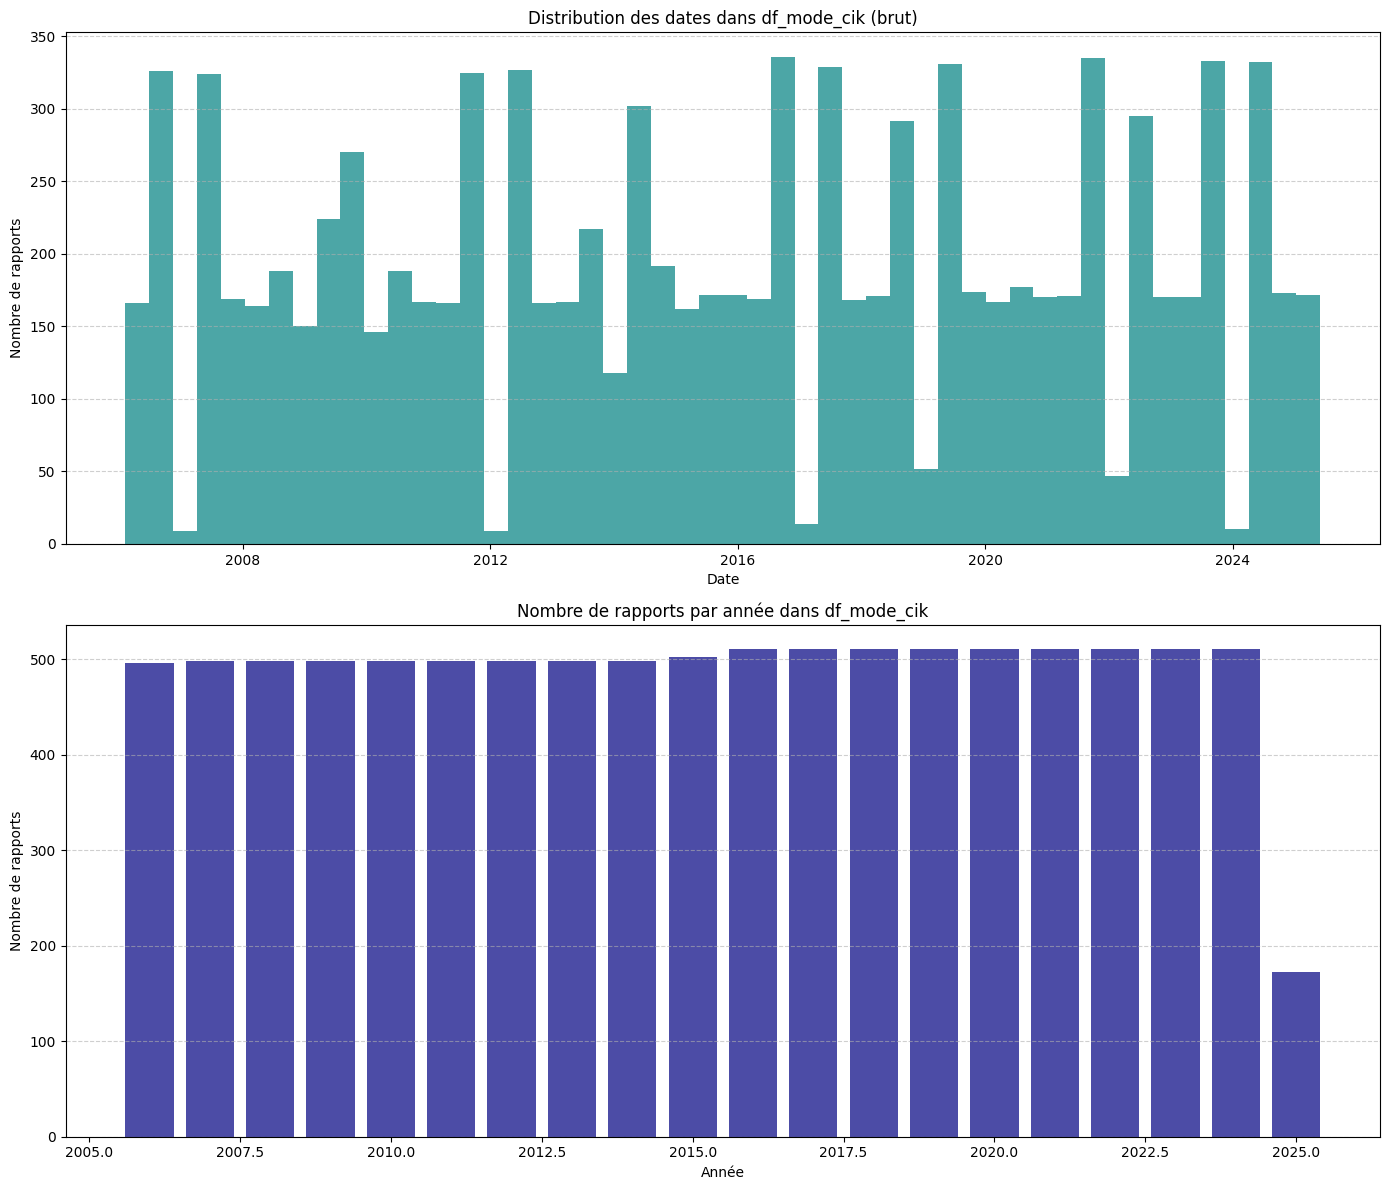

In [17]:
# 1 & 2 : Vérification des conditions de contenu
invalid_rows = df_mode_cik.filter(
    (pl.col("rf").str.strip_chars() == "") |
    (pl.col("mgmt").str.strip_chars() == "") |
    (pl.col("rf").str.len_chars() > 250_000) |
    (pl.col("mgmt").str.len_chars() > 250_000)
)
print("Lignes invalides (doivent être 0) :", invalid_rows.shape[0])

# 3 : Vérification du nombre de CIK distincts
unique_cik_count = df_mode_cik.select(pl.col("cik").n_unique()).item()
print("Nombre de CIK distincts :", unique_cik_count)

# 4 : Vérifier que tous les CIK sont dans df_sp500
cik_in_sp500 = df_mode_cik.join(df_sp500.select("cik"), on="cik", how="anti")
print("CIK présents dans df_mode_cik mais absents du S&P 500 :", cik_in_sp500.shape[0])


# Conversion en pandas
pdf = df_mode_cik.to_pandas()

plt.figure(figsize=(14, 12))

# 1. Histogramme des dates brutes
plt.subplot(2, 1, 1)
plt.hist(pdf["date"], bins=50, color="teal", alpha=0.7)
plt.title("Distribution des dates dans df_mode_cik (brut)")
plt.xlabel("Date")
plt.ylabel("Nombre de rapports")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 2. Comptage par année
pdf["year"] = pdf["date"].dt.year
year_counts = pdf["year"].value_counts().sort_index()

plt.subplot(2, 1, 2)
plt.bar(year_counts.index, year_counts.values, color="navy", alpha=0.7)
plt.title("Nombre de rapports par année dans df_mode_cik")
plt.xlabel("Année")
plt.ylabel("Nombre de rapports")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
# Exporter df_mode_cik en Parquet
df_mode_cik.write_parquet(DATASET_OUTPUT_FILE)

print(f"✅ Dataset exporté avec succès dans : {DATASET_OUTPUT_FILE}")

✅ Dataset exporté avec succès dans : /Users/arthur/Desktop/Hackathon-FIAM-2025/src/text_processing/text_dataset/text_dataset.parquet


: 